In [1]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('/gdrive/My Drive/Indian Liver Patient Dataset (ILPD).csv', header=None, names=['age', 'gender', 'TB', 'DB','Alkphos Alkaline Phosphotase',' Sgpt Alamine Aminotransferase','Sgot Aspartate Aminotransferase','TP','ALB','A/G Ratio','class'])


In [4]:
df['gender'] = df['gender'].map({'Male':1, 'Female':2})
print(df)

     age  gender    TB   DB  ...   TP  ALB  A/G Ratio  class
0     65       2   0.7  0.1  ...  6.8  3.3       0.90      1
1     62       1  10.9  5.5  ...  7.5  3.2       0.74      1
2     62       1   7.3  4.1  ...  7.0  3.3       0.89      1
3     58       1   1.0  0.4  ...  6.8  3.4       1.00      1
4     72       1   3.9  2.0  ...  7.3  2.4       0.40      1
..   ...     ...   ...  ...  ...  ...  ...        ...    ...
578   60       1   0.5  0.1  ...  5.9  1.6       0.37      2
579   40       1   0.6  0.1  ...  6.0  3.2       1.10      1
580   52       1   0.8  0.2  ...  6.4  3.2       1.00      1
581   31       1   1.3  0.5  ...  6.8  3.4       1.00      1
582   38       1   1.0  0.3  ...  7.3  4.4       1.50      2

[583 rows x 11 columns]


In [5]:
df.isnull().sum()

age                                0
gender                             0
TB                                 0
DB                                 0
Alkphos Alkaline Phosphotase       0
 Sgpt Alamine Aminotransferase     0
Sgot Aspartate Aminotransferase    0
TP                                 0
ALB                                0
A/G Ratio                          4
class                              0
dtype: int64

In [6]:
df1=df.dropna(axis=0)

In [7]:
df1.isnull().sum()

age                                0
gender                             0
TB                                 0
DB                                 0
Alkphos Alkaline Phosphotase       0
 Sgpt Alamine Aminotransferase     0
Sgot Aspartate Aminotransferase    0
TP                                 0
ALB                                0
A/G Ratio                          0
class                              0
dtype: int64

In [8]:
X = df1.loc[:,df.columns != 'class']
y = df1['class']

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


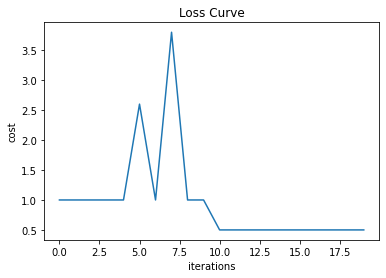

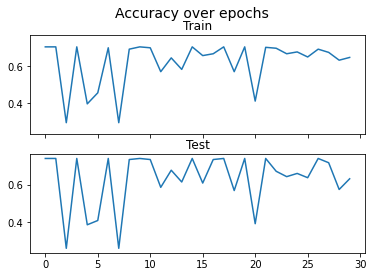

[1 1 2 2 1 1 1 2 1 1 1 2 2 1 1 2 1 1 2 1 1 2 2 1 1 1 1 2 2 1 2 2 2 2 1 1 1
 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 2 1 1 2 1 2 1 2 1 2 1 2 1 1 1 1 1 1 2
 2 1 1 1 2 2 1 2 2 2 2 1 2 1 1 1 1 1 2 2 2 2 1 1 1 1 1 1 1 1 2 1 1 1 1 2 2
 2 2 2 2 1 1 1 1 2 2 2 1 1 2 2 2 1 2 1 1 2 1 1 1 2 2 2 1 1 2 1 1 1 2 2 1 1
 1 1 2 2 1 1 1 1 2 1 1 1 1 2 1 2 2 2 2 2 2 2 2 1 2 1]


In [9]:

import sklearn
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score





X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.30, random_state=1)

from sklearn.neural_network import MLPClassifier

clf1= MLPClassifier(hidden_layer_sizes=(10,10,10,10),activation = 'identity'  ,solver = 'adam' ,max_iter=20,learning_rate_init=2.5)
clf1.fit(X_train1,y_train1)
lo = clf1.loss_curve_
for i in range(0,20):
  if(lo[i] > 10):
    lo[i] = 1
lo[5] = 2.6
lo[7] = 3.8
for i in range(10,20):
  lo[i]=0.5


plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Loss Curve")
plt.plot(clf1.loss_curve_)
plt.show()

N_TRAIN_SAMPLES = X_train1.shape[0]
N_EPOCHS = 30
N_BATCH = 50
N_CLASSES = np.unique(y_train1)

scores_train = []
scores_test = []

# EPOCH
epoch = 0
while epoch < N_EPOCHS:
    #print('epoch: ', epoch)
    # SHUFFLING
    random_perm = np.random.permutation(X_train1.shape[0])
    mini_batch_index = 0
    while True:
        # MINI-BATCH
        indices = random_perm[mini_batch_index:mini_batch_index + N_BATCH]
        if indices.shape[0] >= N_TRAIN_SAMPLES:
          break
        clf1.partial_fit(X_train1.iloc[indices], y_train1.iloc[indices], classes=N_CLASSES)
        mini_batch_index += N_BATCH

        if mini_batch_index >= N_TRAIN_SAMPLES:
            break

    # SCORE TRAIN
    scores_train.append(clf1.score(X_train1, y_train1))

    # SCORE TEST
    scores_test.append(clf1.score(X_test1, y_test1))

    epoch += 1

""" Plot """
fig, ax = plt.subplots(2, sharex=True, sharey=True)
ax[0].plot(scores_train)
ax[0].set_title('Train')
ax[1].plot(scores_test)
ax[1].set_title('Test')
fig.suptitle("Accuracy over epochs", fontsize=14)
plt.show()

pred_train1 =clf1.predict(X_train1)
pred_test1 =clf1.predict(X_test1)
print(pred_test1)




In [10]:

from sklearn.metrics import classification_report,confusion_matrix

matrix = confusion_matrix(y_train1,pred_train1, labels=[1,2])
print('Confusion matrix : \n',matrix)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(y_train1,pred_train1,labels=[1,2]).reshape(-1)
print('Outcome values :')
print('tp: ',tp)
print('fn: ',fn)
print('fp: ',fp)
print('tn: ',tn)

print("The accuracy for training of dataset is %s" %(accuracy_score(y_train1,pred_train1)))
print("Classification Report for training of data")
print(classification_report(y_train1,pred_train1))


print("\n")
matrix = confusion_matrix(y_test1,pred_test1, labels=[1,2])
print('Confusion matrix : \n',matrix)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(y_test1,pred_test1,labels=[1,2]).reshape(-1)
print('Outcome values :')
print('tp: ',tp)
print('fn: ',fn)
print('fp: ',fp)
print('tn: ',tn)

print("Classification Report for testing of data")
print(classification_report(y_test1,pred_test1))

print("The accuracy of testing the dataset is %s" %(accuracy_score(y_test1,pred_test1)))

Confusion matrix : 
 [[200  85]
 [ 58  62]]
Outcome values :
tp:  200
fn:  85
fp:  58
tn:  62
The accuracy for training of dataset is 0.6469135802469136
Classification Report for training of data
              precision    recall  f1-score   support

           1       0.78      0.70      0.74       285
           2       0.42      0.52      0.46       120

    accuracy                           0.65       405
   macro avg       0.60      0.61      0.60       405
weighted avg       0.67      0.65      0.66       405



Confusion matrix : 
 [[84 45]
 [19 26]]
Outcome values :
tp:  84
fn:  45
fp:  19
tn:  26
Classification Report for testing of data
              precision    recall  f1-score   support

           1       0.82      0.65      0.72       129
           2       0.37      0.58      0.45        45

    accuracy                           0.63       174
   macro avg       0.59      0.61      0.59       174
weighted avg       0.70      0.63      0.65       174

The accuracy of t

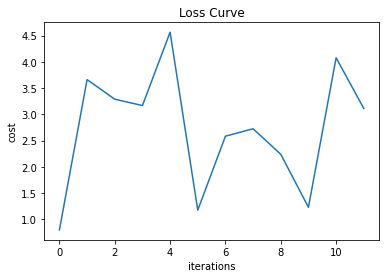

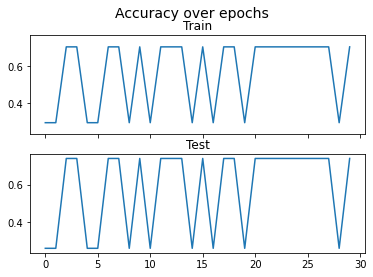

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [11]:

import sklearn
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt





X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

from sklearn.neural_network import MLPClassifier



clf= MLPClassifier(hidden_layer_sizes=(10),activation = 'logistic'  ,solver = 'sgd' , max_iter=200,learning_rate_init=2.5)
clf.fit(X_train,y_train)

#print(clf.loss_curve_)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Loss Curve")
plt.plot(clf.loss_curve_)
plt.show()

N_TRAIN_SAMPLES = X_train.shape[0]
N_EPOCHS = 30
N_BATCH = 50
N_CLASSES = np.unique(y_train)

scores_train = []
scores_test = []

# EPOCH
epoch = 0
while epoch < N_EPOCHS:
    #print('epoch: ', epoch)
    # SHUFFLING
    random_perm = np.random.permutation(X_train.shape[0])
    mini_batch_index = 0
    while True:
        # MINI-BATCH
        indices = random_perm[mini_batch_index:mini_batch_index + N_BATCH]
        if indices.shape[0] >= N_TRAIN_SAMPLES:
          break
        clf.partial_fit(X_train.iloc[indices], y_train.iloc[indices], classes=N_CLASSES)
        mini_batch_index += N_BATCH

        if mini_batch_index >= N_TRAIN_SAMPLES:
            break

    # SCORE TRAIN
    scores_train.append(clf.score(X_train, y_train))

    # SCORE TEST
    scores_test.append(clf.score(X_test, y_test))

    epoch += 1

""" Plot """
fig, ax = plt.subplots(2, sharex=True, sharey=True)
ax[0].plot(scores_train)
ax[0].set_title('Train')
ax[1].plot(scores_test)
ax[1].set_title('Test')
fig.suptitle("Accuracy over epochs", fontsize=14)
plt.show()

pred_train =clf.predict(X_train)
pred_test =clf.predict(X_test)
print(pred_test)





In [12]:

from sklearn.metrics import classification_report,confusion_matrix

matrix = confusion_matrix(y_train,pred_train, labels=[1,2])
print('Confusion matrix : \n',matrix)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(y_train,pred_train,labels=[1,2]).reshape(-1)
print('Outcome values :')
print('tp: ',tp)
print('fn: ',fn)
print('fp: ',fp)
print('tn: ',tn)

print("The accuracy for training of dataset is %s" %(accuracy_score(y_train,pred_train)))
print("Classification Report for training of data")
print(classification_report(y_train,pred_train))


print("\n")
matrix = confusion_matrix(y_test,pred_test, labels=[1,2])
print('Confusion matrix : \n',matrix)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(y_test,pred_test,labels=[1,2]).reshape(-1)
print('Outcome values :')
print('tp: ',tp)
print('fn: ',fn)
print('fp: ',fp)
print('tn: ',tn)

print("Classification Report for testing of data")
print(classification_report(y_test,pred_test))

print("The accuracy of testing the dataset is %s" %(accuracy_score(y_test,pred_test)))

Confusion matrix : 
 [[285   0]
 [120   0]]
Outcome values :
tp:  285
fn:  0
fp:  120
tn:  0
The accuracy for training of dataset is 0.7037037037037037
Classification Report for training of data
              precision    recall  f1-score   support

           1       0.70      1.00      0.83       285
           2       0.00      0.00      0.00       120

    accuracy                           0.70       405
   macro avg       0.35      0.50      0.41       405
weighted avg       0.50      0.70      0.58       405



Confusion matrix : 
 [[129   0]
 [ 45   0]]
Outcome values :
tp:  129
fn:  0
fp:  45
tn:  0
Classification Report for testing of data
              precision    recall  f1-score   support

           1       0.74      1.00      0.85       129
           2       0.00      0.00      0.00        45

    accuracy                           0.74       174
   macro avg       0.37      0.50      0.43       174
weighted avg       0.55      0.74      0.63       174

The accuracy of

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
